# Perkenalan

Nama : Praduta Firman Anugrah

Batch : FTDS-002

Sumber Dataset : https://www.kaggle.com/dgawlik/nyse?select=prices-split-adjusted.csv

Dataset : Berisi tentang analisis teknis dan fundamental, It is said that 30% of traffic on stocks is already generated by machines, can trading be fully automated? If not, there is still a lot to learn from historical data.

Objectives : model linear regression untuk memprediksi closing price saham Amazon

# Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Loading

In [2]:
df = pd.read_csv('prices-split-adjusted.csv')

In [3]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
df.tail()

,date,symbol,open,close,low,high,volume
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
851263,2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 39.0+ MB


In [6]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [7]:
df.shape

(851264, 7)

In [8]:
df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

# Data Cleaning

In [9]:
df.isna().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

Tidak terdapat missing Values

# Eksplorasi Data

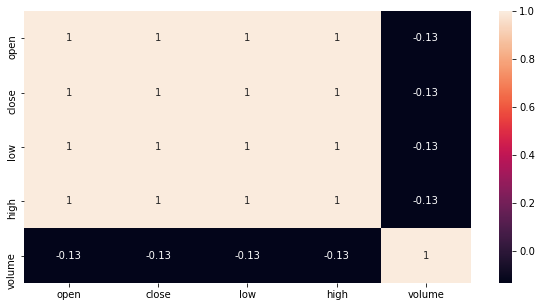

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True);

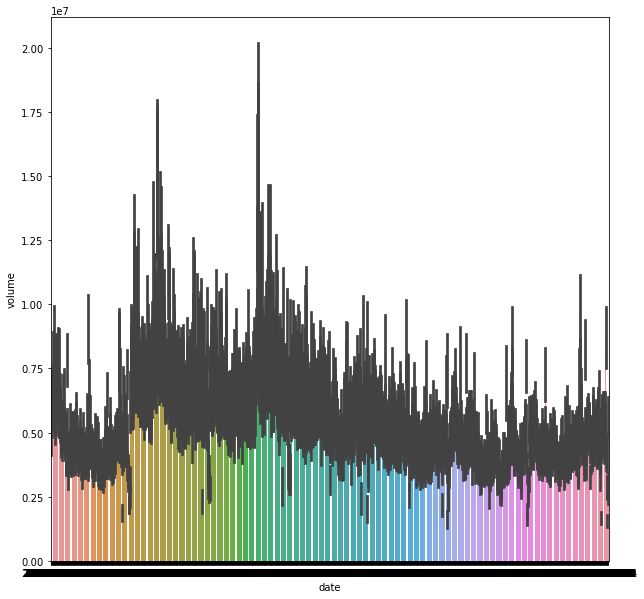

In [11]:
plt.figure(figsize=(10,10))
sns.barplot(x='date',y='volume',data=df);

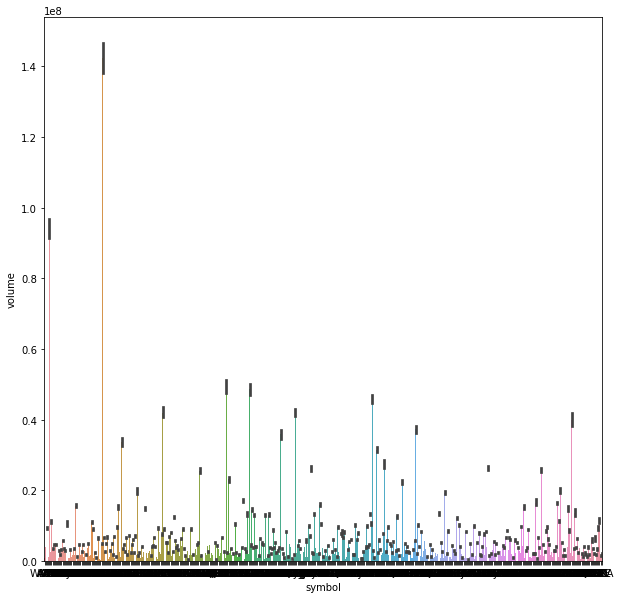

In [12]:
plt.figure(figsize=(10,10))
sns.barplot(x='symbol',y='volume',data=df);

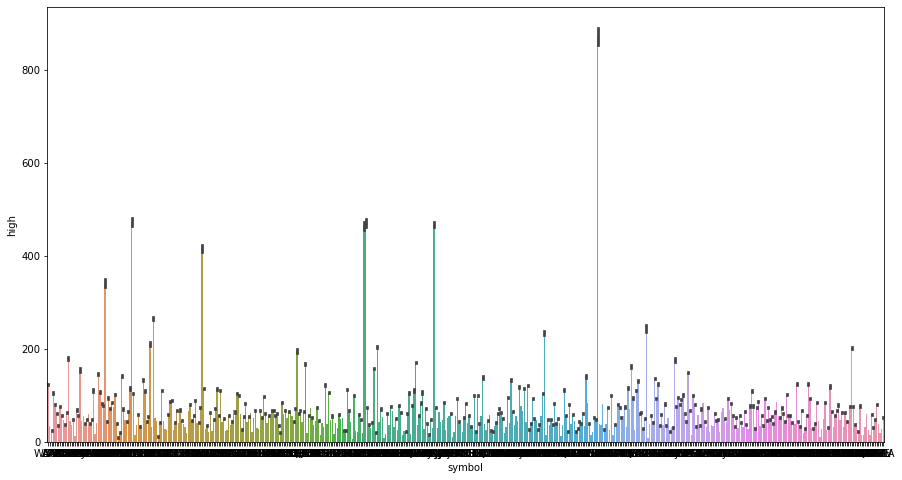

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(x='symbol',y='high',data=df);

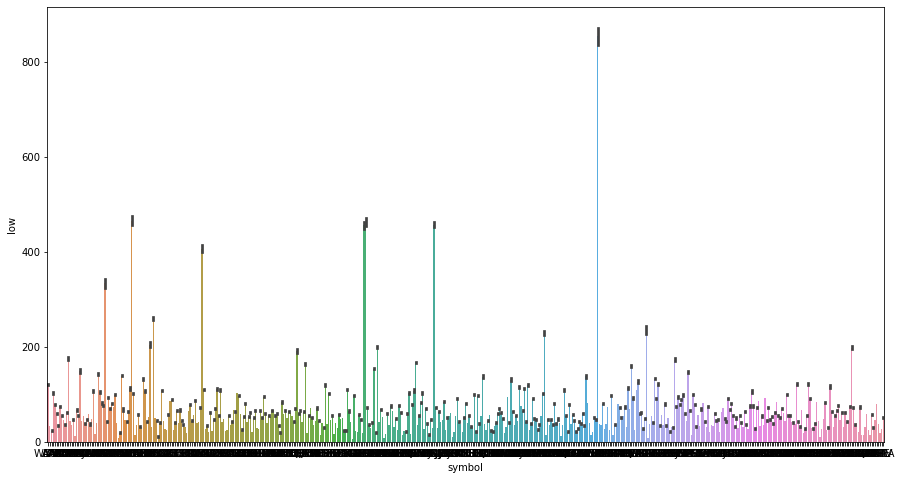

In [14]:
plt.figure(figsize=(15,8))
sns.barplot(x='symbol',y='low',data=df);

# Data Preprocessing

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(['volume'], axis=1)
y = df['volume']

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train)

ValueError: could not convert string to float: 'ALL'

# Pendefinisian Model

In [ ]:
linear_model = LinearRegression(fit_intercept=True)

In [ ]:
%time linear_model.fit(X_train_trf, y_train)

In [ ]:
ridge_reg = Ridge(alpha=0.1, max_iter=1000, tol=0.001)

%time ridge_reg.fit(X_train_trf, y_train)

# Evaluasi Model

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
X_val_trf = scaler.transform(X_val)

In [ ]:
%time y_preds = linear_model.predict(X_val_trf)

In [ ]:
linear_model.score(X_val_trf, y_val)

In [ ]:
linear_model.score(X_train_trf, y_train)

In [ ]:
R2_score_lin = r2_score(y_val, y_preds)
print(f'R2_score : {R2_score_lin: .2f}')

MAE = mean_absolute_error(y_val, y_preds)
print(f'MAE: {MAE:.2f}')

MSE = mean_squared_error(y_val, y_preds)
print(f'MSE: {MSE:.2f}') 

RMSE = np.sqrt(mean_squared_error(y_val, y_preds))
print(f'RMSE: {RMSE:.2f}')

In [ ]:
%time y_preds_ridge = ridge_reg.predict(X_val_trf)

In [ ]:
ridge_reg.score(X_val_trf, y_val)

In [ ]:
ridge_reg.score(X_train_trf, y_train)

In [ ]:
R2_score_ridge = r2_score(y_val, y_preds_ridge)
print(f'R2_score : {R2_score_ridge: .2f}')

MAE_ridge = mean_absolute_error(y_val, y_preds_ridge)
print(f'MAE_ridge: {MAE_ridge:.2f}')

MSE_ridge = mean_squared_error(y_val, y_preds_ridge)
print(f'MSE_ridge: {MSE_ridge:.2f}') 

RMSE_ridge = np.sqrt(mean_squared_error(y_val, y_preds_ridge))
print(f'RMSE_ridge: {RMSE_ridge:.2f}')

# Model Inference

In [39]:
y_preds = ridge_reg.predict(X)
y_preds

NameError: name 'ridge_reg' is not defined

In [40]:
y_preds_linear = linear_model.predict(X)

AttributeError: module 'sklearn.linear_model' has no attribute 'predict'

In [41]:
df['predicted'] = y_preds_linear

NameError: name 'y_preds_linear' is not defined

# Classification SVM Loan Pay Back

# Data Loading

In [20]:
dataset = pd.read_csv('loan_data.csv')

In [21]:
dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [22]:
dataset.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1010.2+ KB


In [24]:
dataset.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [25]:
dataset.shape

(9578, 14)

In [26]:
dataset.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

# Data Cleaning

In [27]:
dataset.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

# Eksplorasi Data

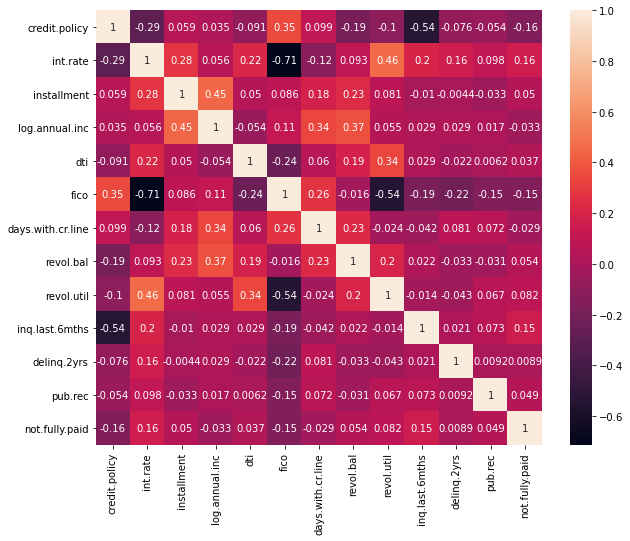

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True);

# Data Preprocessing

In [29]:
X = dataset.drop('not.fully.paid', axis=1)
y = dataset['not.fully.paid']

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train)

ValueError: could not convert string to float: 'home_improvement'

# Pendefinisian Model

In [34]:
model_svc_lin = SVC(kernel='linear', random_state=42, C=1)

In [35]:
model_svc_rbf = SVC(kernel='rbf', random_state=42, C=1)

# Pelatihan Model

In [ ]:
%time model_svc_lin.fit(X_train_trf, y_train)

In [ ]:
%time model_svc_rbf.fit(X_train_trf, y_train)

# Evaluasi Model

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [ ]:
%time y_preds = model_svc.predict(X_train_trf)

In [ ]:
print("Classification Report: \n", classification_report(y_train, y_preds))

In [ ]:
print("confusion_matrix: \n", confusion_matrix(y_train, y_preds))

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

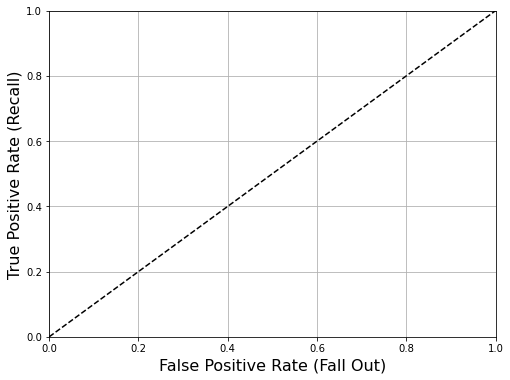

In [38]:
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (Fall Out)', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.grid(True)
labels=['SVM RBF']
for idx,model in enumerate([model_svc_rbf]):
    y_scores = model.decision_function(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right");

In [ ]:
predictions = model_svc_rbf.predict(X_train)
predictions